<IPython.core.display.Javascript object>


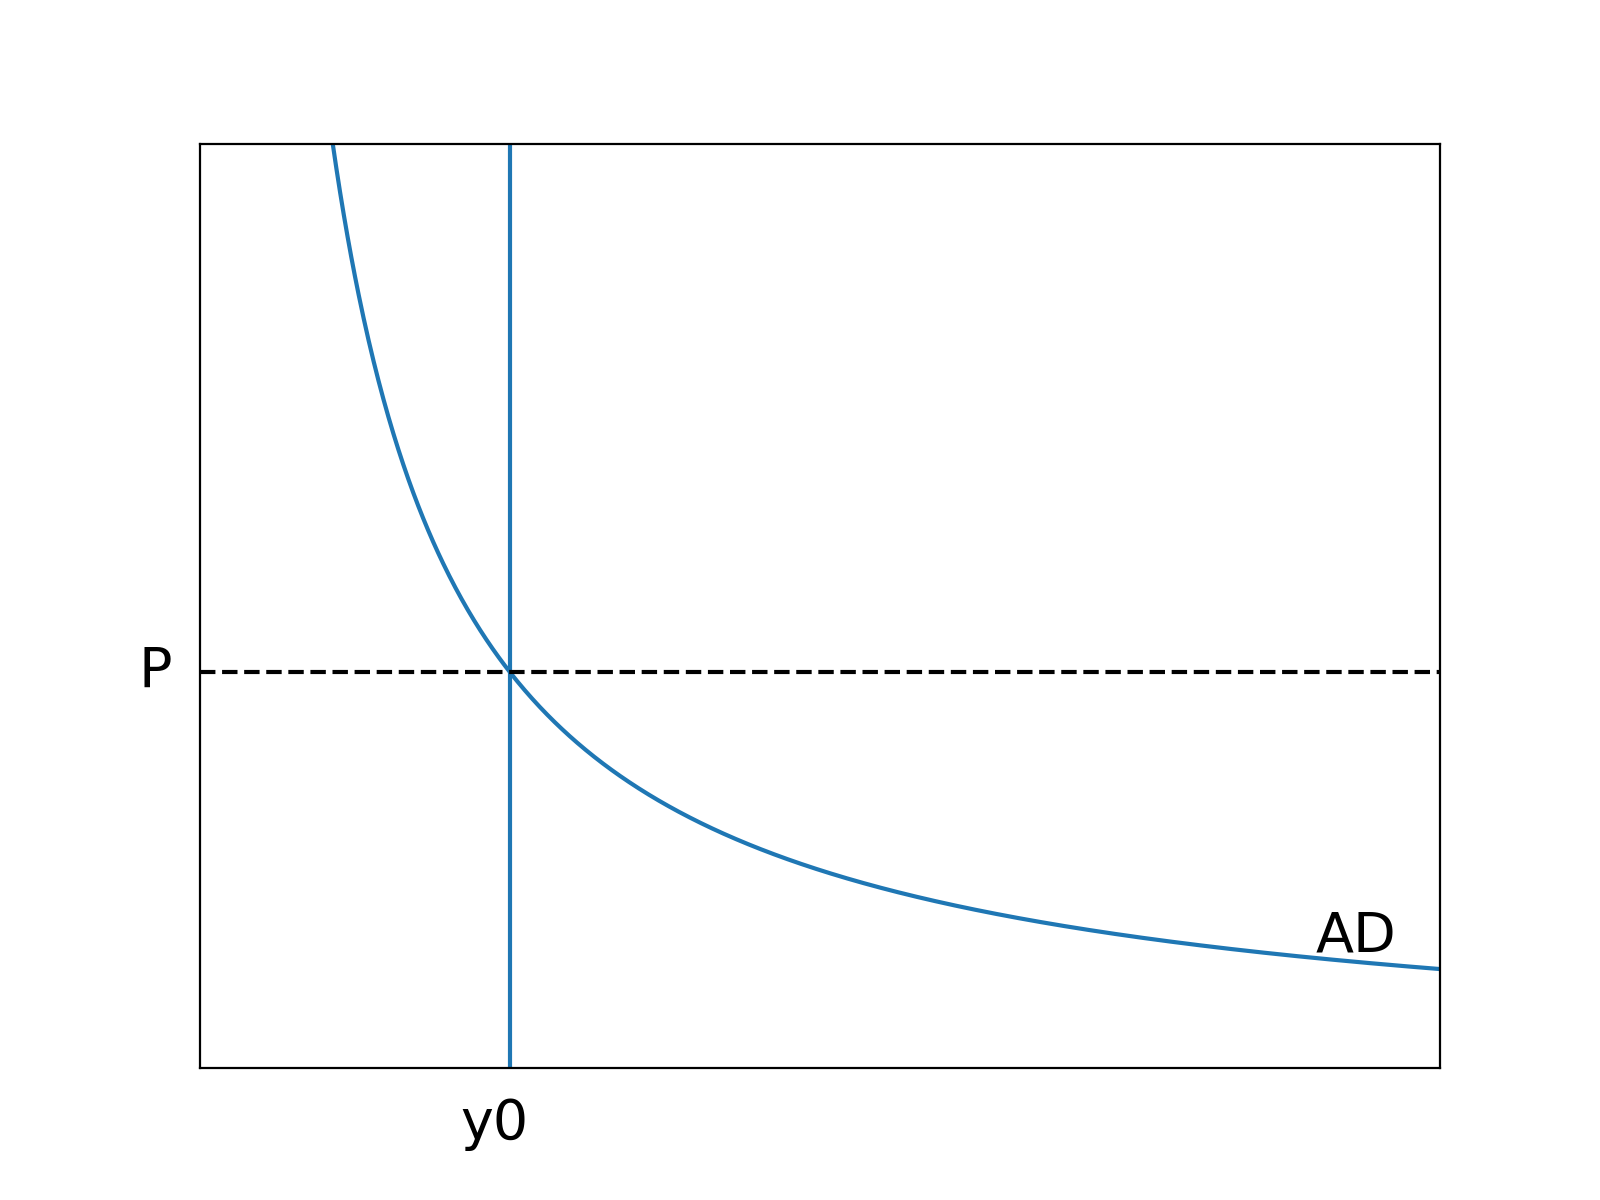

interactive(children=(IntSlider(value=1000, description='M', max=2000, min=250, step=10), FloatSlider(value=12…

In [2]:
%matplotlib notebook
import ipywidgets as ipw 
import numpy as np
import matplotlib.pyplot as plt

class livePlot(): 
    def __init__(self, M = 10 ** 3, V = 8, y0 = 10 ** 2 * 5):

        plt.rcParams["font.size"] = 20
        self.fig, self.ax = plt.subplots(1, figsize = (8, 6))
        self.ax.set_ylim(0, 130)
        self.ax.set_xlim(0, 1000)
        plt.xticks([])
        plt.yticks([])

        self.M = 10 ** 3
        self.V = 8

        self.y = np.linspace(1, self.M, self.M)
        self.y0 = 10 ** 2 * 5

        self.AD, = self.ax.plot(self.y, self.M * self.V / self.y)
        self.LRAS = self.ax.axvline(self.y0)

        x_int, y_int = self.get_intersect(self.AD, self.LRAS, line2_vert = True)
        self.h_line_intersect = self.ax.axhline(y_int, xmin = 0, xmax = x_int, 
                                      ls = "--", color = "k")

        self.text_vert_shift = 1
        self.text_horiz_shift = 20
        self.P_text = self.ax.text(-50, y_int, "P")
        self.AD_text = self.ax.text(900, self.AD.get_ydata()[900] + self.text_vert_shift * -2, "AD")
        self.y0_text = self.ax.text(self.LRAS.get_xdata(orig=False)[0] - self.text_horiz_shift * 2, -10, "y0")
        self.interact()
        
    def interact(self):
        def update(M = self.M, V = self.V, y0 = self.y0):
            self.AD.set_ydata(M * V / self.y)
            self.LRAS.set_xdata(y0)
            x_int, y_int = self.get_intersect(self.AD, self.LRAS, line2_vert = True)
            self.h_line_intersect.set_ydata(y_int)
            self.AD_text.set_position((900, self.AD.get_ydata()[900] + self.text_vert_shift))
            self.P_text.set_position((-50, y_int + self.text_vert_shift * -2))
            self.y0_text.set_position((self.LRAS.get_xdata(orig=False)[0] - self.text_horiz_shift * 2,-10))
            self.fig.canvas.draw_idle()

        ipw.interact(update, 
                     M = ipw.widgets.IntSlider(value=self.M,
                       min=self.M / 4,
                       max=self.M * 2,
                       step=10),
                    V = ipw.widgets.FloatSlider(value = self.V * 1.5,
                        min= self.V / 4,
                        max = self.V * 2,
                        step = .1),
                    y0 = ipw.widgets.IntSlider(values = self.y0,
                        min = self.y0 / 2,
                        max = self.y0 * 2,
                        step = 5))
        
    def get_intersect(self, line1, line2, line2_vert = False):
        if line2_vert == False:
            x = np.argwhere(np.diff(np.sign(line1 - line2))).flatten()
        else:
            line1_data = line1.get_data()
            # set orig = False or else list reads as float
            line2_xdata = line2.get_xdata(orig=False)[0]
            dist = [np.abs(i - line2_xdata) for i in line1_data[0]]
            min_dist = min(dist)
            x = dist.index(min_dist)
            y = line1_data[1][x]

        return x, y




plot = livePlot()
